In [25]:
addprocs(10)
@everywhere include("voiConsAuc.jl")

In [26]:
@everywhere f(n, p) = evsi_sim([1, 0], [1, .2], [n * p, n * (1 - p)], nsims = 2000000)

In [35]:
@time x = @parallel hcat for i = linspace(1, 50, 20)
  [f(i, j) for j = .99:-.005:.01]
end

170.036905 seconds (37.30 k allocations: 1.830 MB)


197×20 Array{Float64,2}:
  0.0246483     0.0569775    …  0.0799558  0.0800909   0.0791309
  0.0240837     0.056694        0.0796437  0.0788837   0.0785382
  0.0242454     0.0555795       0.0799817  0.0794825   0.0785432
  0.0243442     0.057054        0.0788713  0.0780947   0.0787804
  0.0255748     0.0562975       0.077496   0.0793207   0.0786284
  0.0239964     0.0555025    …  0.0774257  0.0778734   0.0784621
  0.0234818     0.055928        0.0783517  0.0783979   0.0783693
  0.0227754     0.0561716       0.0774008  0.077959    0.077875 
  0.0230791     0.0555629       0.0785548  0.0785123   0.0771133
  0.0248252     0.0557922       0.0770868  0.0776287   0.0788677
  0.0233495     0.0563798    …  0.0777432  0.0778959   0.0778961
  0.0228239     0.0549972       0.0780385  0.0782781   0.0770262
  0.023096      0.0549419       0.0783308  0.0779809   0.0775275
  ⋮                          ⋱                                  
  0.000304872   0.000581171  …  0.0542587  0.0571337   0.058223 


In [41]:
writedlm("sim.csv", x, ',')

In [6]:
using RCall, DataFrames

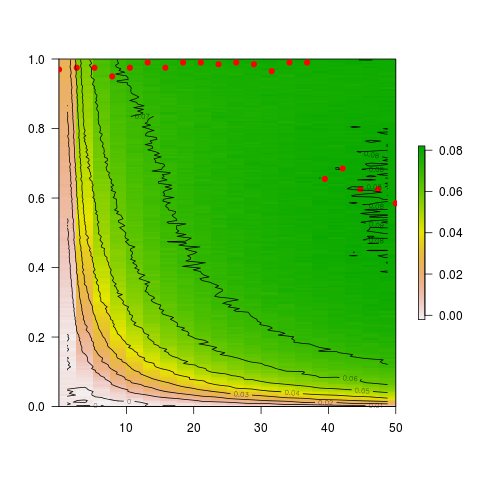

RCall.RObject{RCall.RealSxp}
[1] 0.2 0.4 0.6 0.8 1.0


In [43]:
R"
    library(raster)
    library(mgcv)
    r = $x
    #r = 
    #  data.frame(
    #    x = rep(seq_len(ncol(r)), each = nrow(r)),
    #    y = rep(seq_len(nrow(r)), times = ncol(r)),
    #    z = c(r)
    #)
    #r = gam(z ~ te(x, y), data = r)
    #r = matrix(fitted(r), ncol = 20)
    r = raster(r)
    x = seq(0, 1, length.out = 20)
    m = seq(.99, .01, -.005)[apply($x, 2, which.max)]
    plot(r, asp = NA, las = 1, xaxt = 'n')
    #m = predict(gam(m ~ s(x)))
    points(x, m, pch = 19, col = 'red')
    contour(r, add = TRUE)
    axis(1, at = 1:5 / 5, label = seq(10, 50, length.out = 5))
"

In [30]:
g(n, p) = evsi_an([1, 0], [1, .2], [n * p, n * (1 - p)])
y = [g(i, j) for j = .99:-.01:.01, i = linspace(1, 50, 20)]

99×20 Array{Float64,2}:
 0.0248685    0.0568284    0.066311     …  0.0807356   0.0808823  0.0810147
 0.0246078    0.0566273    0.0661744       0.0807913   0.0809439  0.081082 
 0.0243451    0.0564229    0.0660352       0.0808437   0.0810019  0.0811453
 0.0240804    0.0562151    0.0658932       0.0808929   0.0810563  0.0812049
 0.0238137    0.0560039    0.0657484       0.080939    0.0811075  0.0812609
 0.023545     0.0557892    0.0656008    …  0.080982    0.0811554  0.0813135
 0.0232743    0.0555709    0.0654502       0.0810222   0.0812003  0.0813628
 0.0230015    0.0553489    0.0652966       0.0810596   0.0812421  0.0814089
 0.0227267    0.0551231    0.0651399       0.0810942   0.0812811  0.0814519
 0.0224499    0.0548934    0.0649799       0.0811262   0.0813172  0.081492 
 0.0221711    0.0546598    0.0648167    …  0.0811556   0.0813507  0.0815292
 0.0218902    0.0544221    0.0646501       0.0811825   0.0813815  0.0815636
 0.0216072    0.0541803    0.0644801       0.0812069   0.0814097

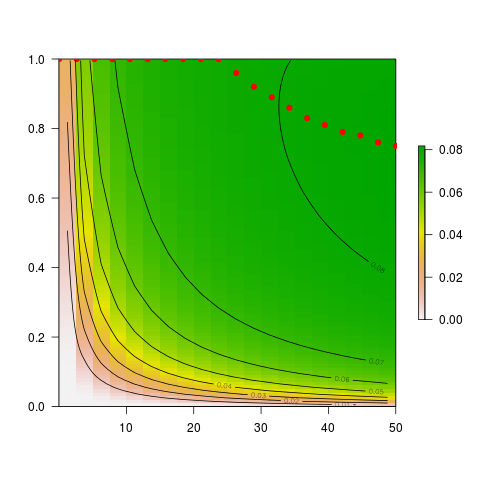

RCall.RObject{RCall.RealSxp}
[1] 0.2 0.4 0.6 0.8 1.0


In [32]:
R"
    library(raster)
    library(mgcv)
    r = $y
    r = raster(r)
    x = seq(0, 1, length.out = 20)
    m = seq(1, 0, -.01)[apply($y, 2, which.max)]
    plot(r, asp = NA, las = 1, xaxt = 'n')
    points(x, m, pch = 19, col = 'red')
    contour(r, add = TRUE)
    axis(1, at = 1:5 / 5, label = seq(10, 50, length.out = 5))
"